# Exploratory Data Analysis

## Imports

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
import jsonlines
import sys
from tqdm.notebook import tqdm

## Loading the Data

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.utils.reader import JsonlReader

In [4]:
train_reader = JsonlReader('../data/train.jsonl',size=50)
train_dics = train_reader.read()

In [5]:
dev_reader = JsonlReader('../data/dev.jsonl',size=20)
dev_dics = dev_reader.read()

In [6]:
test_reader = JsonlReader('../data/test.jsonl')
test_dics = test_reader.read()

In [7]:
train_reader = JsonlReader('../data/train.jsonl',size=5)
train_dics = train_reader.read()

# Visualizing

In [17]:
def visualize_sample(dics,sample_size=10,fontsize=17,test=False):
    sample = np.random.choice(dics,sample_size)
    split = lambda x: '\n'.join([' '.join(x.split()[i:i+10]) for i in range(0,len(x.split()),10)]) if len(x.split())>10 else x

    mp = {0:'Non-Hateful',1:'Hateful'}
    if(test):
        cols = 2
    else:
        cols = 3
    fig,ax = plt.subplots(sample_size,cols,figsize=(50,30))
    for i in range(sample_size):
        ax[i][0].imshow(Image.open('../data/{}'.format(sample[i]['img'])))
        ax[i][0].axis('off')
        ax[i][1].text(x=0,y=0.5,s=split(sample[i]['text']),fontsize=fontsize)
        ax[i][1].set_xticklabels([])
        ax[i][1].set_yticklabels([])
        ax[i][1].axis('off')
        if(not test):
            ax[i][2].text(x=0,y=0.5,s=mp[sample[i]['label']],fontsize=fontsize)
            ax[i][2].set_xticklabels([])
            ax[i][2].set_yticklabels([])
            ax[i][2].axis('off')
    plt.subplots_adjust(wspace=0,hspace=0.25)
    plt.show()

## Visualizing Train

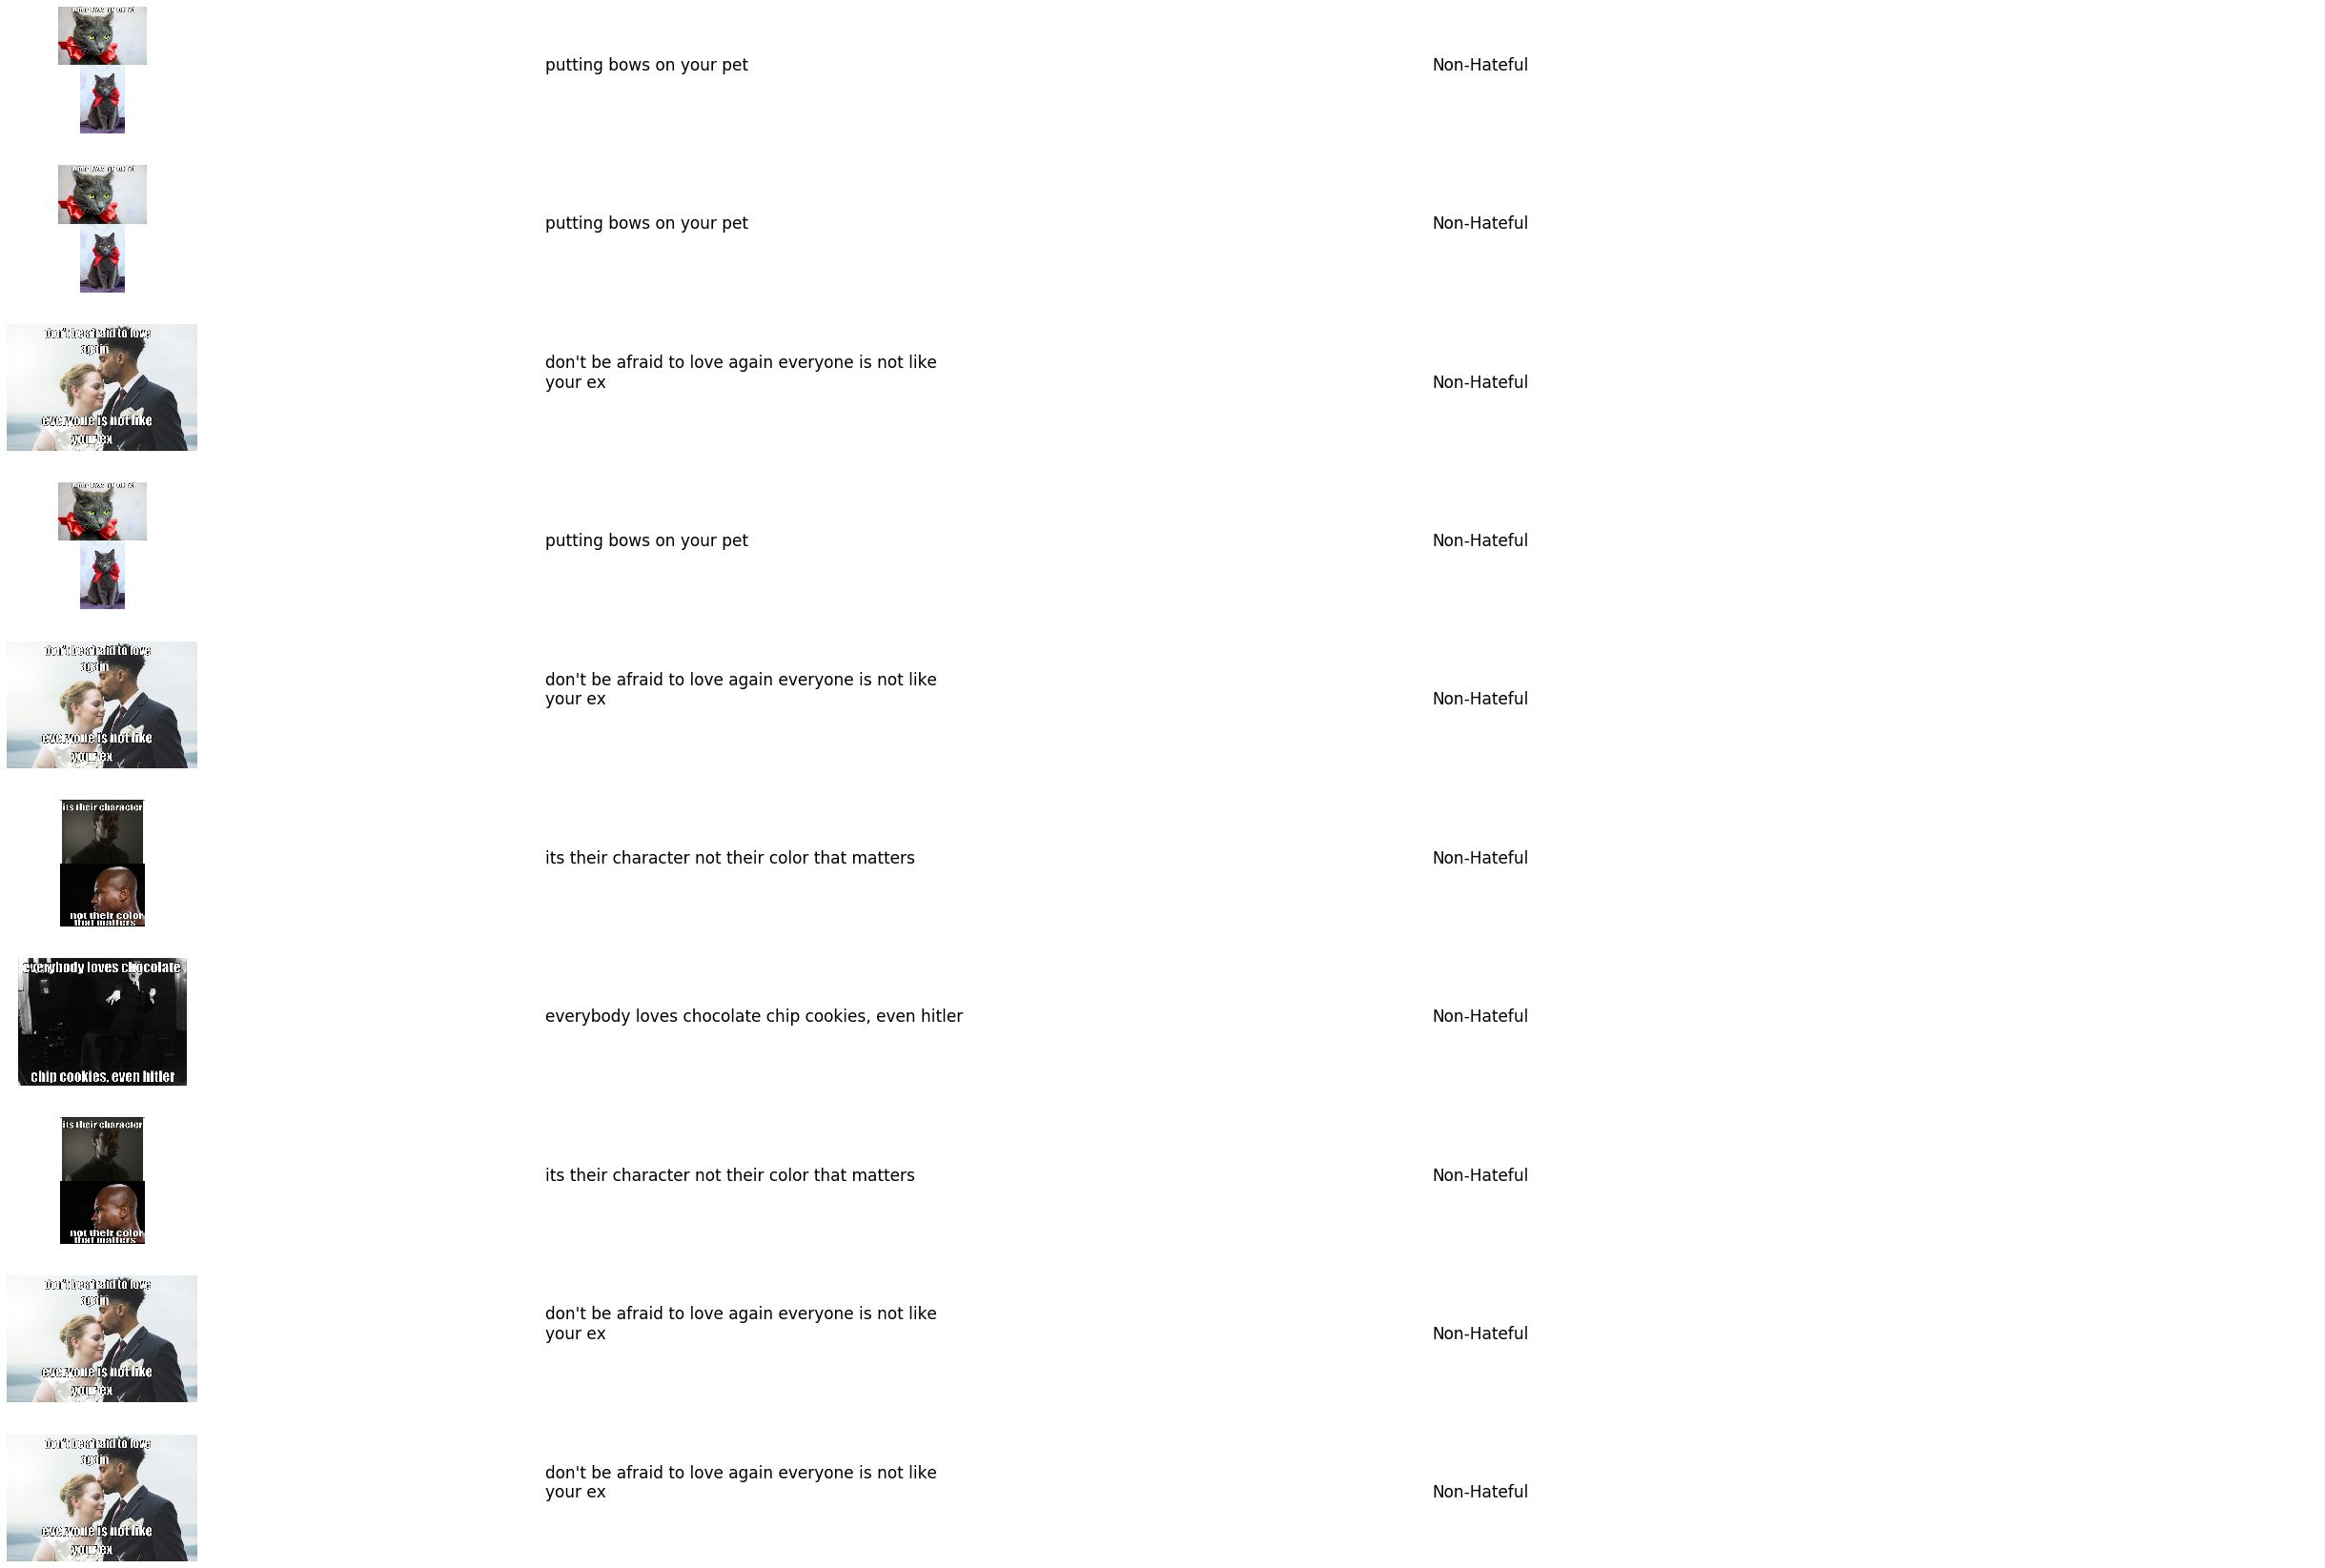

In [18]:
visualize_sample(train_dics)

## Visualizing Dev

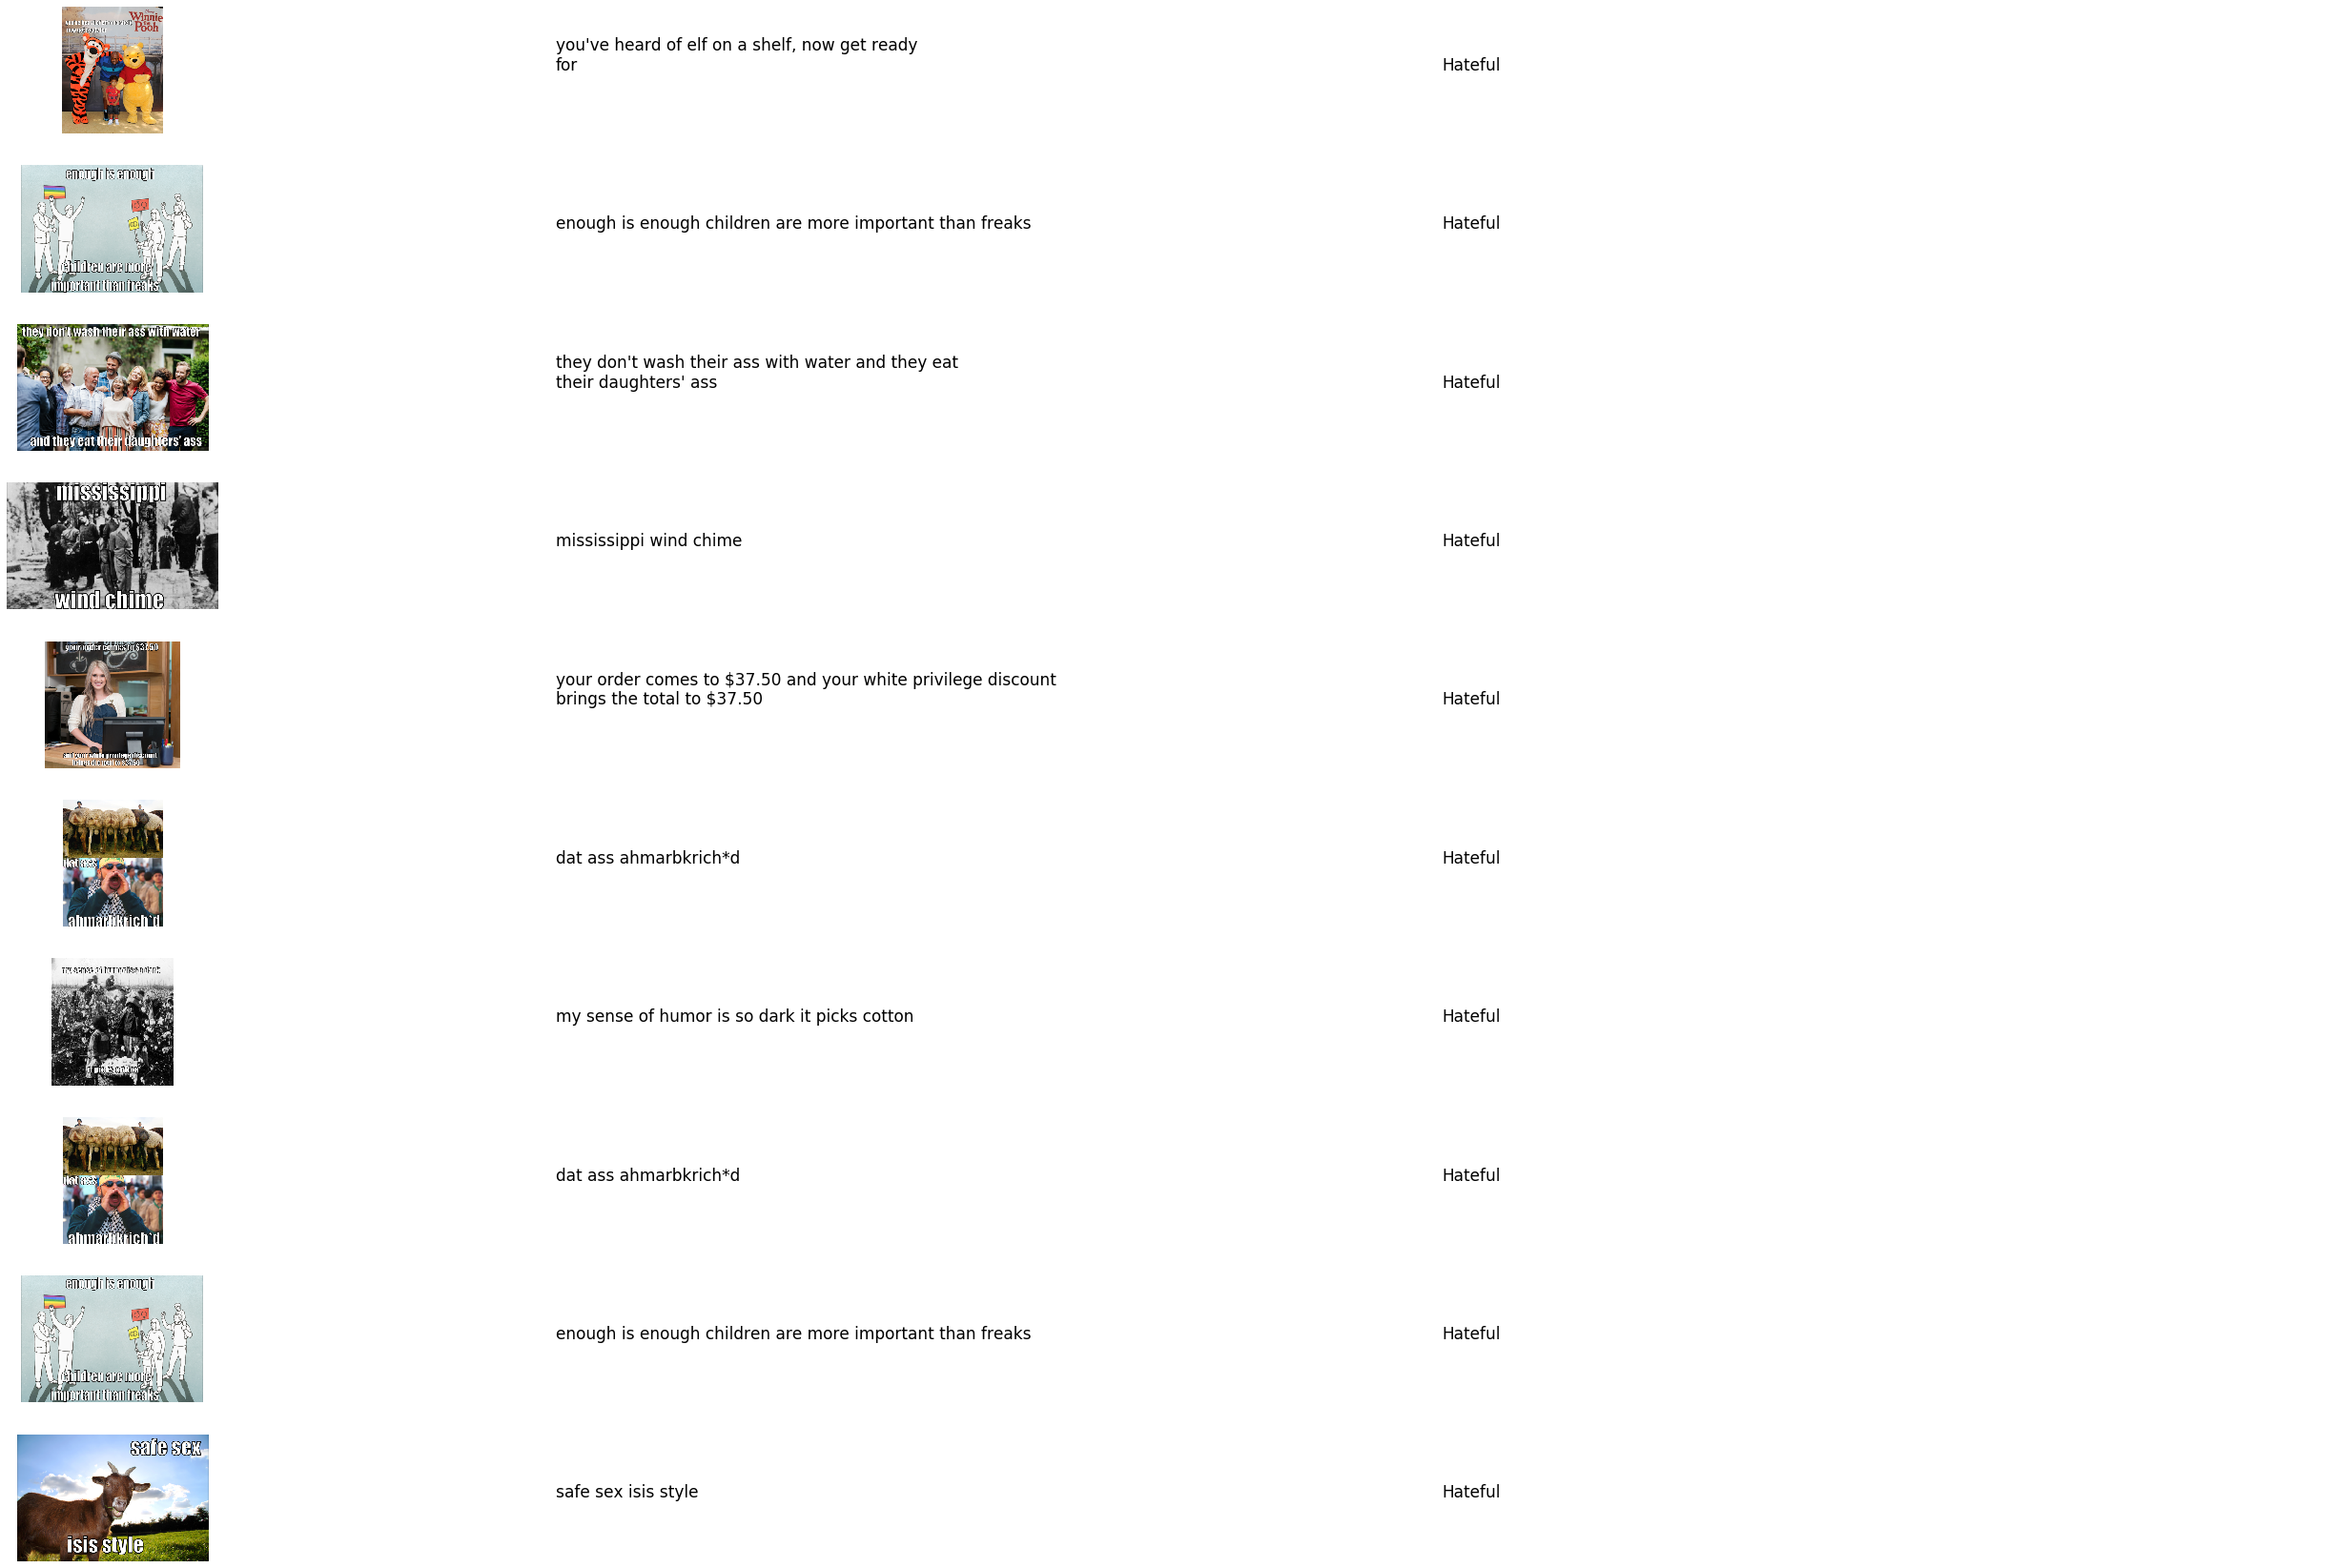

In [19]:
visualize_sample(dev_dics)

## Visualize Test

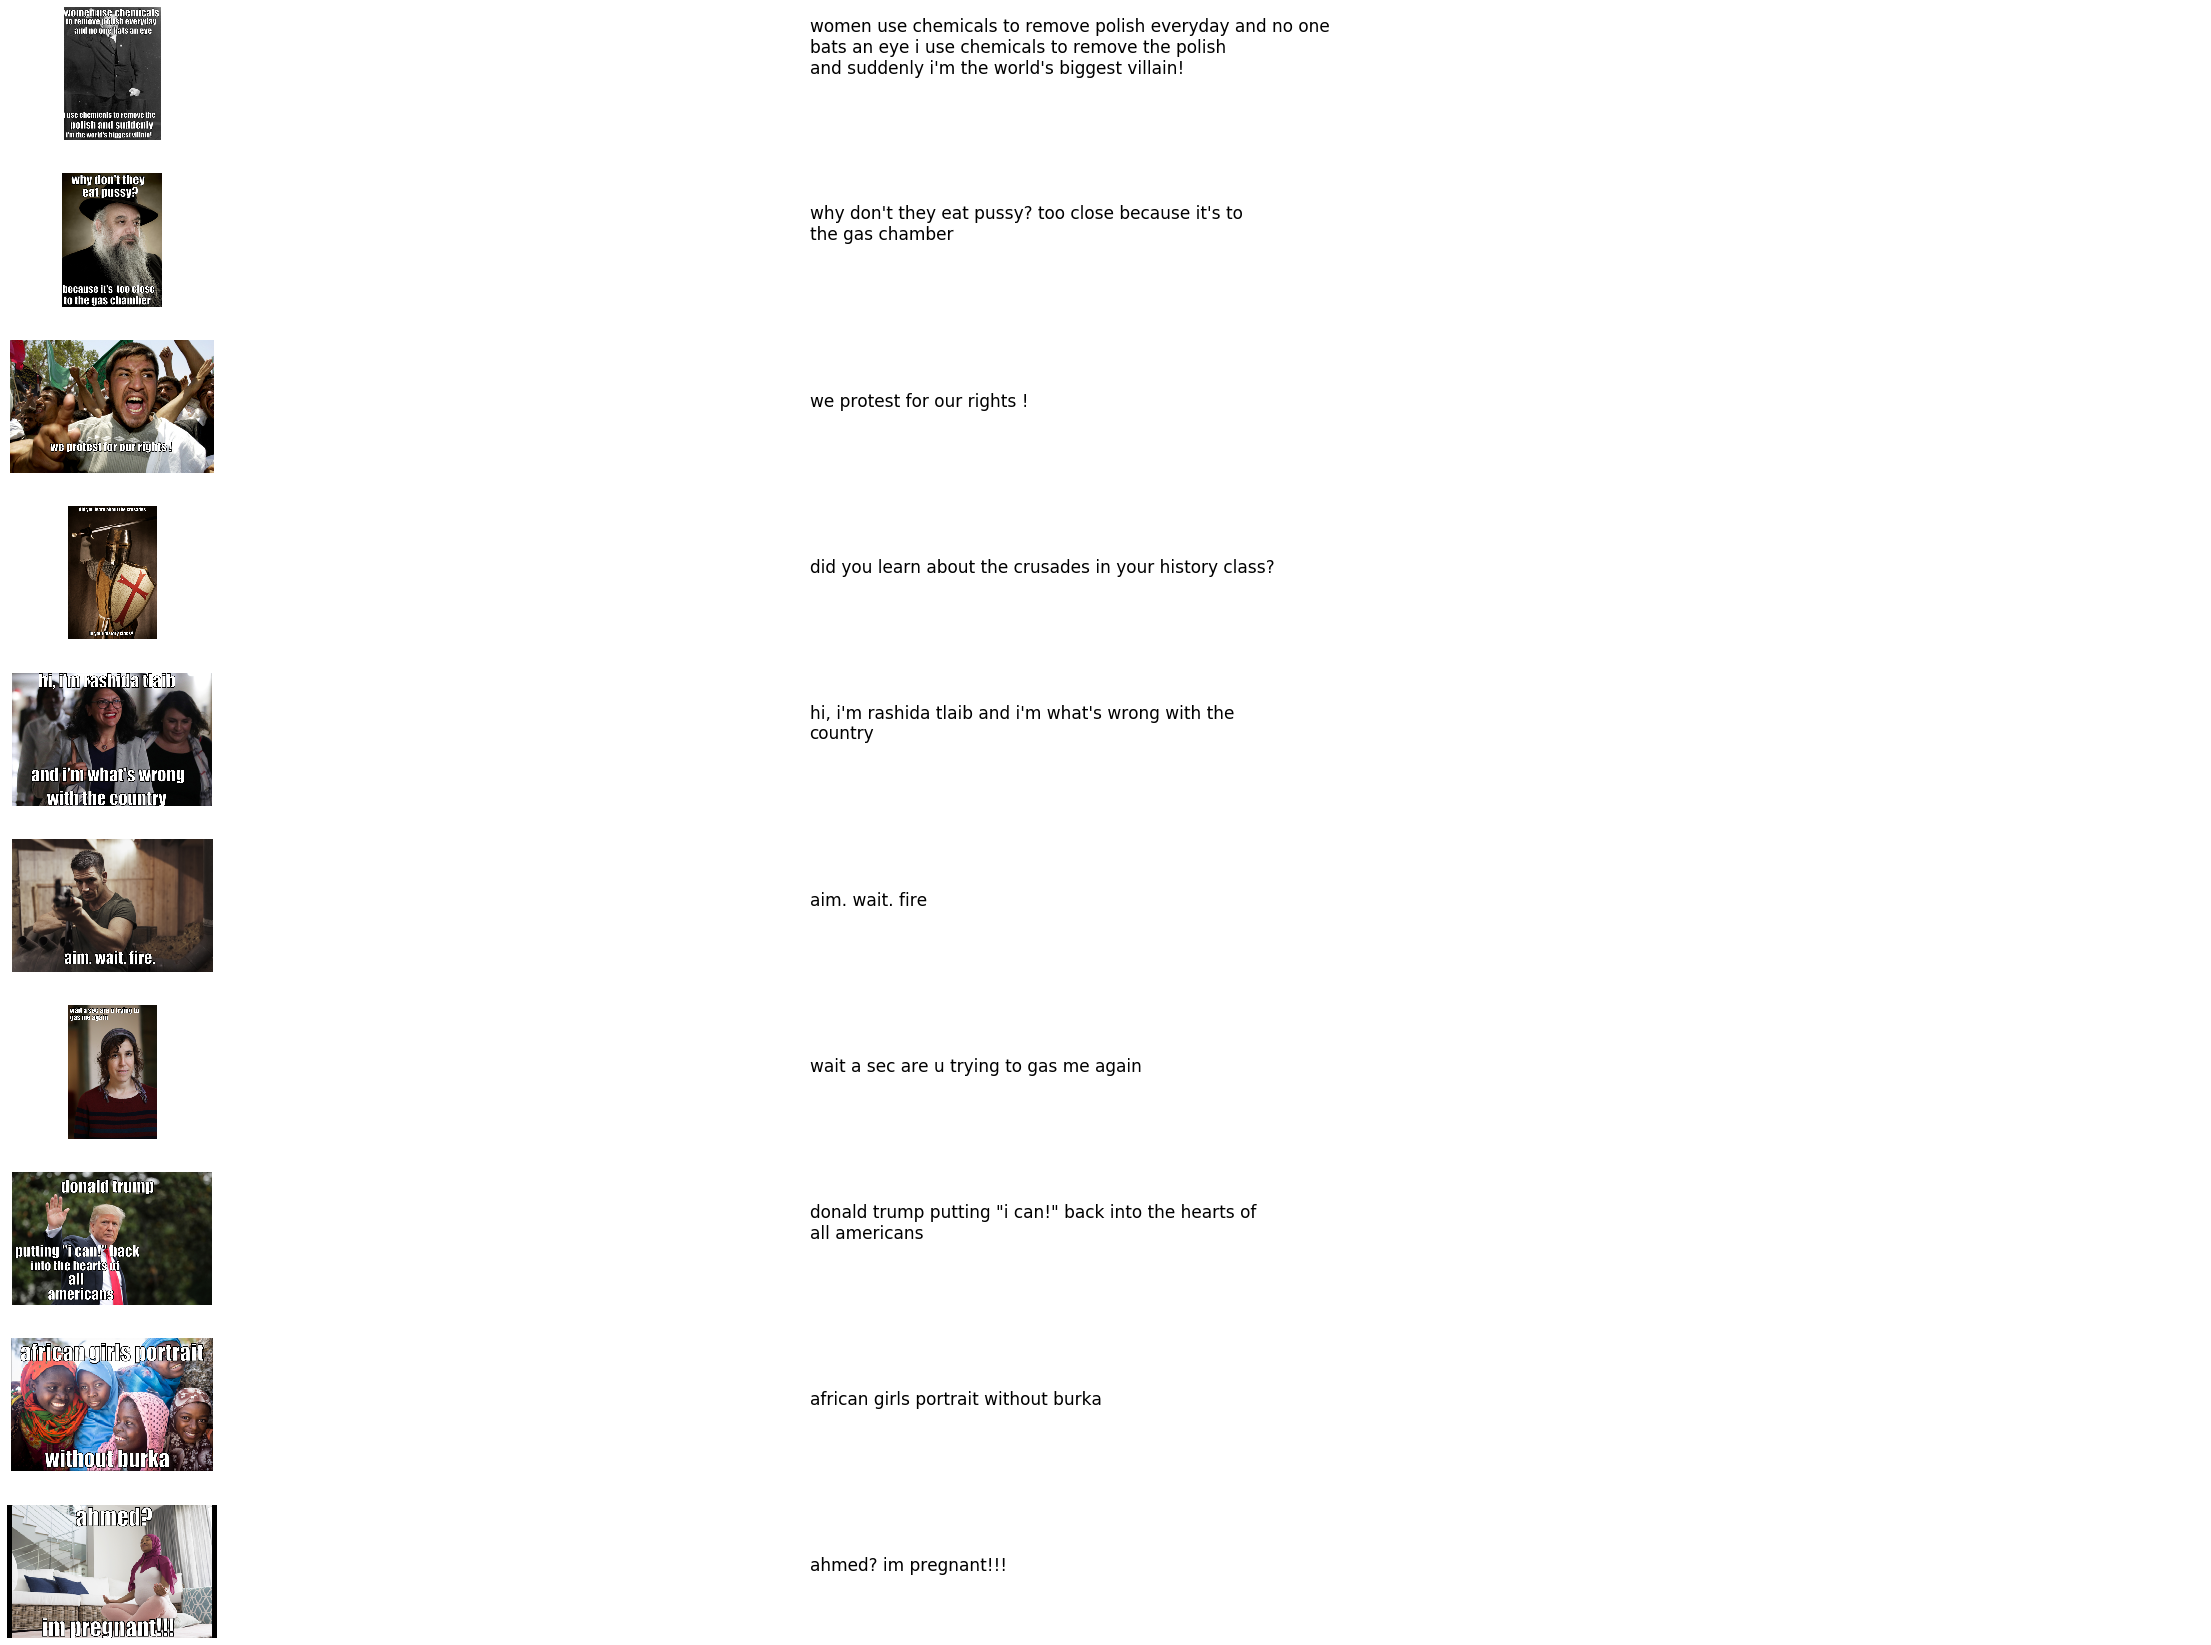

In [20]:
visualize_sample(test_dics,test=True)

# Viewing Frequency Distribution of Most Common Words

In [21]:
import nltk
nltk.download('punkt')

def mostCommon(dics,count=10):
    all_text = ' '.join(dic['text'] for dic in dics)
    all_words = nltk.tokenize.word_tokenize(all_text)
    #print(len(all_words))
    stopwords = nltk.corpus.stopwords.words('english')
    all_freq_dist = nltk.FreqDist(word.lower() for word in all_words if word not in stopwords and word.isalnum())
    most_common = all_freq_dist.most_common(count)
    return most_common

[nltk_data] Downloading package punkt to /home/crocoder/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
def plotMostCommon(dics,count=None,figsize=(2)):
    most_common = np.array(mostCommon(dics,count))
    #print(most_common)
    fig = plt.figure(figsize=(20,10))
    plt.bar(most_common[:,0],most_common[:,1].astype(np.int64))
    plt.show()

## Most Common Words Train

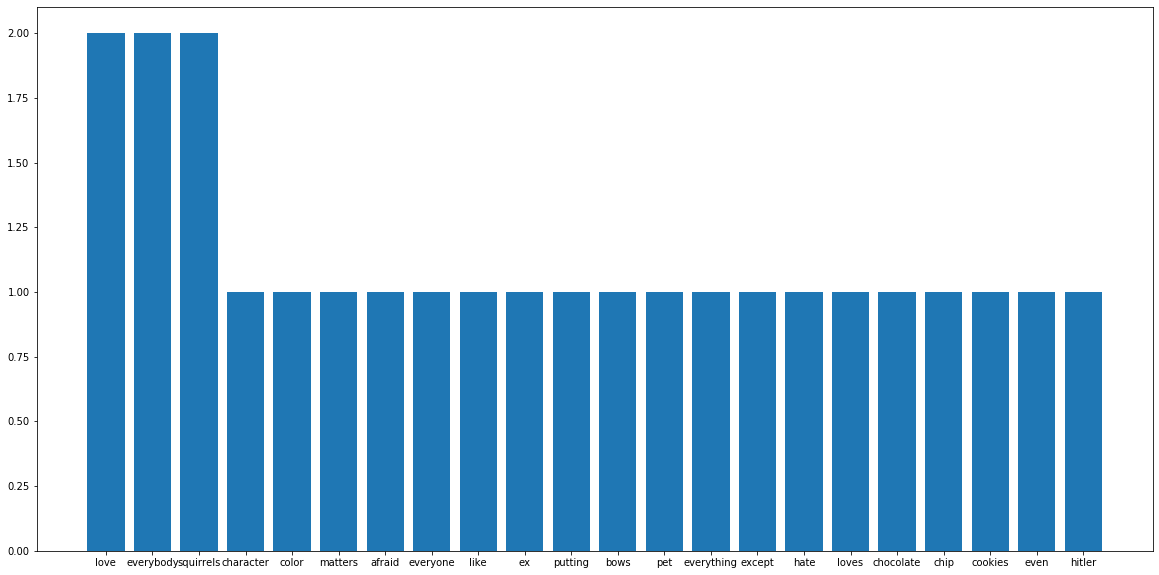

In [23]:
plotMostCommon(train_dics,25)

## Most Common Words Dev

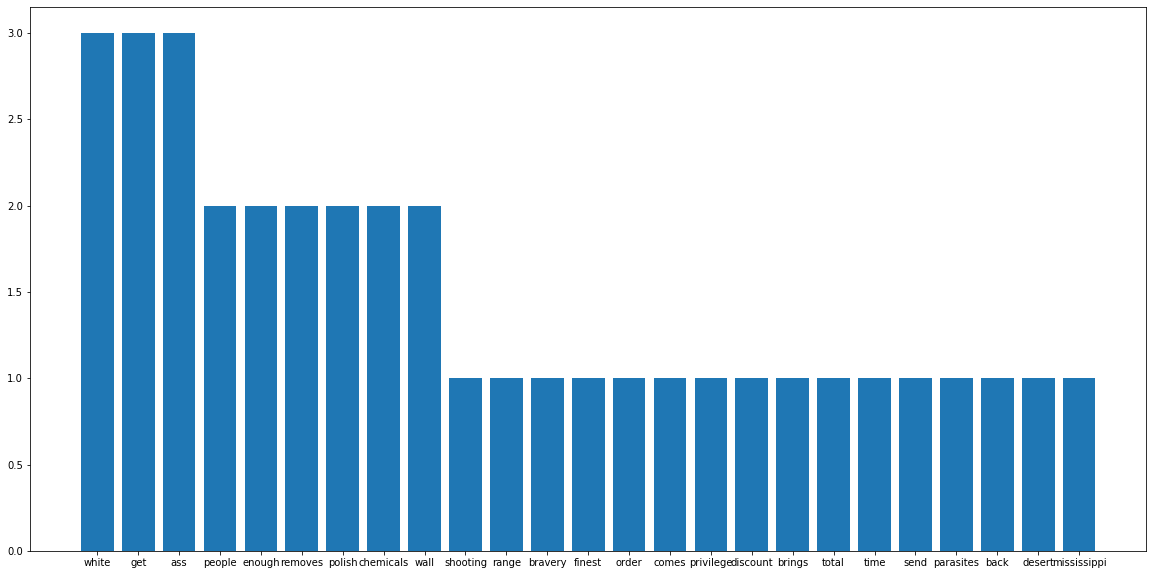

In [24]:
plotMostCommon(dev_dics,25)

## Most Common Words Test

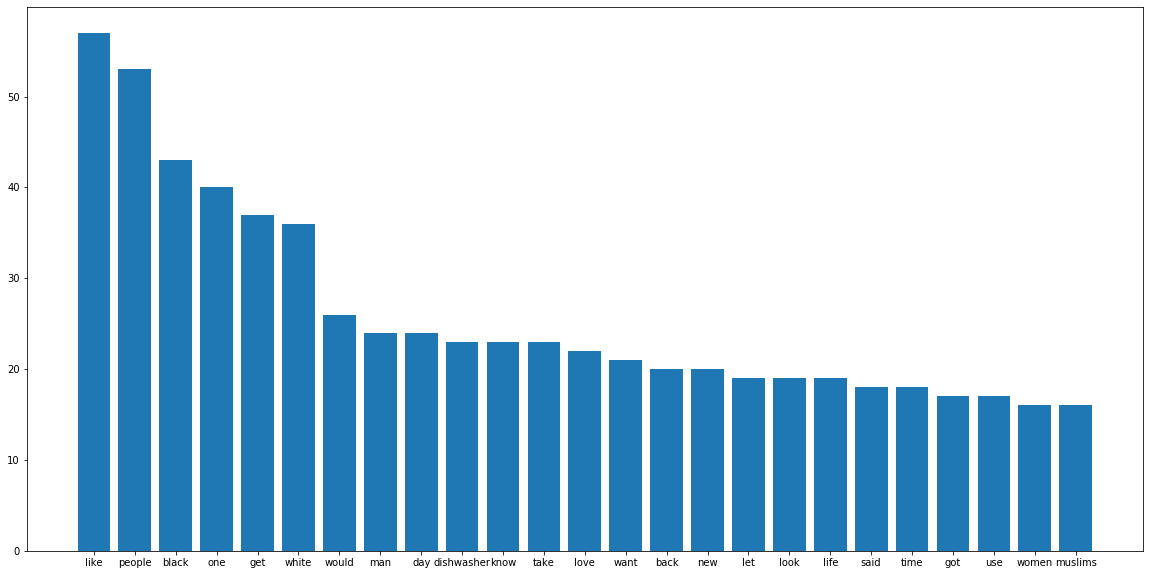

In [25]:
plotMostCommon(test_dics,25)

# Image Shape Means

In [26]:
def getImageShapeMean(dics):
    mean_shape = np.array([0.,0.,0.])
    for dic in tqdm(dics):
        img = np.array(Image.open(os.path.join('../data/',dic['img'])))
        #print(img.shape)
        img_shape = np.array(img.shape)
        mean_shape += img_shape/len(dics)
    return mean_shape

In [27]:
getImageShapeMean(train_dics)

array([589.8, 573.2,   3. ])

In [28]:
getImageShapeMean(dev_dics)

array([478.2 , 532.95,   3.  ])

In [29]:
getImageShapeMean(test_dics)

array([522.239, 616.448,   3.   ])

## Mean and Std of Images - Resize to 500x600x3

In [30]:
def getImageStats(dics,sample_size):
    imgs =  np.array([])
    dics = np.random.choice(dics,sample_size)
    for dic in tqdm(dics):
        img = np.array(Image.open(os.path.join('../data/',dic['img'])).convert('RGB').resize((500,600),Image.BICUBIC))
        #print(img.shape)
        imgs = np.append(imgs,img)
    imgs = imgs.reshape(sample_size,500,600,3)
    return np.mean(imgs,axis=(0,1,2)),np.std(imgs,axis=(0,1,2))

In [31]:
getImageStats(train_dics,100)

(array([123.10498803, 119.53044317, 119.75126023]),
 array([95.71848731, 97.0586728 , 98.4129962 ]))

In [32]:
getImageStats(dev_dics,100)

(array([131.60129903, 123.29613683, 120.9767148 ]),
 array([81.89773623, 77.37160207, 83.24836956]))

In [33]:
getImageStats(test_dics,100)

(array([128.46031017, 121.4829971 , 115.3263902 ]),
 array([80.7930985 , 78.7266832 , 80.73691728]))

## Mean and Std of Text Length

In [34]:
def getTextLengthStats(dics):
    txt_lens = []
    for dic in tqdm(dics):
        txt_lens.append(len(dic['text'].split()))
    return np.mean(txt_lens),np.std(txt_lens)

In [35]:
getTextLengthStats(train_dics)

(8.6, 2.5768197453450252)

In [36]:
getTextLengthStats(dev_dics)

(9.45, 4.716725559114076)

In [37]:
getTextLengthStats(test_dics)

(10.419, 5.858791598956222)